# K Nearest Neighbors

## Predicting the Character

In [58]:
#Importing necessary Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

#Import Naive Bayes 
from sklearn.neighbors import KNeighborsClassifier

#Other libraries needed 
from sklearn.metrics import (plot_confusion_matrix, accuracy_score, classification_report)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

#For streamlit
import pickle

In [2]:
#import the dataset
friends = pd.read_csv('../../Datasets/friends-modeling.csv')
friends.head()

,season,episode,character,dialogue
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I ...
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's ..."
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hum..."
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?"
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through w..."


In [3]:
#Make sure no nulls
friends.isnull().sum()

season       0
episode      0
character    0
dialogue     0
dtype: int64

### Make X and y values 

In [4]:
X = friends['dialogue']
y = friends['character']

### Split into Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Baseline Accuracy 

In [6]:
y_train.value_counts(normalize=True)

Rachel Green      0.177657
Ross Geller       0.177152
Chandler Bing     0.169355
Monica Geller     0.167242
Joey Tribbiani    0.160725
Phoebe Buffay     0.147869
Name: character, dtype: float64

### Making a Pipeline for the GridSearch Using CountVectorizer

In [7]:
# Get the same accuracy and scores 
np.random.seed(42)

In [8]:
pipe = Pipeline(steps=[('cv', CountVectorizer()),
                      ('knn', KNeighborsClassifier())])

### Modeling the KNN Using GridSearch and Default Parameters

In [9]:
grid_d = {'cv__stop_words': [None, 'english'],
         'cv__min_df': [0, 1, 2]}

In [10]:
gs_d = GridSearchCV(estimator=pipe, param_grid=grid_d)
gs_d.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2],
                         'cv__stop_words': [None, 'english']})

In [11]:
gs_d.best_params_

{'cv__min_df': 2, 'cv__stop_words': 'english'}

In [12]:
print(f'Train score: {gs_d.score(X_train, y_train)}\nTest score: {gs_d.score(X_test, y_test)}')

Train score: 0.43078204975598144
Test score: 0.21112301374754508


---
**Making Predictions**

In [13]:
preds_d = gs_d.predict(X_test)

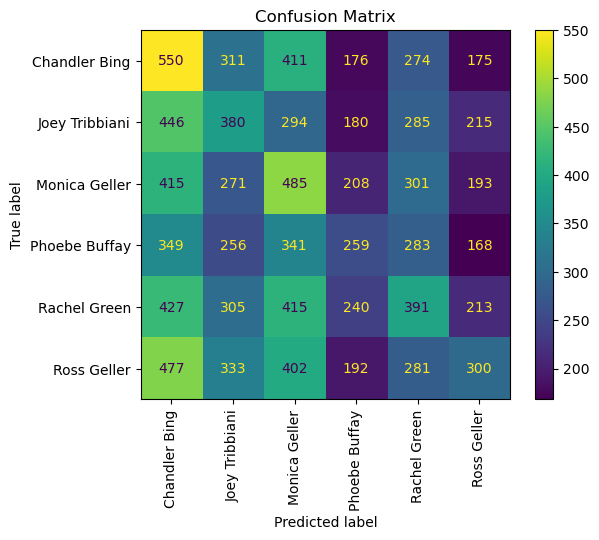

In [14]:
#Plotting a Confusion Matrix to show a comparison between actual and predicted values.
plot_confusion_matrix(estimator=gs_d, X = X_test, y_true=y_test)
plt.xticks(rotation = 90)
plt.show()

In [15]:
print(classification_report(y_true=y_test, y_pred=preds_d))

                precision    recall  f1-score   support

 Chandler Bing       0.21      0.29      0.24      1897
Joey Tribbiani       0.20      0.21      0.21      1800
 Monica Geller       0.21      0.26      0.23      1873
 Phoebe Buffay       0.21      0.16      0.18      1656
  Rachel Green       0.22      0.20      0.21      1991
   Ross Geller       0.24      0.15      0.18      1985

      accuracy                           0.21     11202
     macro avg       0.21      0.21      0.21     11202
  weighted avg       0.21      0.21      0.21     11202



---
**Making a dataframe with actual, predictions, and dialogue**

In [16]:
knn_d = pd.DataFrame(y_test)

knn_d['predictions'] = preds_d

knn_d['dialogue'] = X_test

knn_d.rename(columns={'character': 'actual'}, inplace=True)
knn_d.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Joey Tribbiani,Then what's the problem?
12970,Phoebe Buffay,Ross Geller,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Chandler Bing,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Rachel Green,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Phoebe Buffay,Great. So the ball is in his court?
23737,Monica Geller,Rachel Green,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [17]:
#Check which character is predicted the most by this first model
knn_d['predictions'].value_counts()

Chandler Bing     2664
Monica Geller     2348
Joey Tribbiani    1856
Rachel Green      1815
Ross Geller       1264
Phoebe Buffay     1255
Name: predictions, dtype: int64

In [18]:
#How many times each character appears
knn_d['actual'].value_counts()

Rachel Green      1991
Ross Geller       1985
Chandler Bing     1897
Monica Geller     1873
Joey Tribbiani    1800
Phoebe Buffay     1656
Name: actual, dtype: int64

In [19]:
#how many are predicted wrong
knn_d[knn_d['actual'] != knn_d['predictions']].count()

actual         8837
predictions    8837
dialogue       8837
dtype: int64

In [20]:
#how many are predicted correctly
knn_d[knn_d['actual'] == knn_d['predictions']].count()

actual         2365
predictions    2365
dialogue       2365
dtype: int64

---
**Predicting Some Phrases**

In [21]:
gs_d.predict(["How you doin'?"])[0]

'Joey Tribbiani'

In [22]:
gs_d.predict(['Smelly cat, smelly cat, what are they feeding you'])[0]

'Phoebe Buffay'

In [23]:
gs_d.predict(['We were on a break!'])[0]

'Ross Geller'

### With Parameter Tuning

In [24]:
grid_1 = {'cv__stop_words':[None, 'english'],
        'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
        'knn__n_neighbors': [5, 7, 9, 11, 13]
       }

In [25]:
gs_1 = GridSearchCV(pipe, param_grid= grid_1)
gs_1.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
                         'cv__stop_words': [None, 'english'],
                         'knn__n_neighbors': [5, 7, 9, 11, 13]})

In [26]:
gs_1.best_params_

{'cv__min_df': 3, 'cv__stop_words': 'english', 'knn__n_neighbors': 13}

In [27]:
print(f'Train score: {gs_1.score(X_train, y_train)}\nTest score: {gs_1.score(X_test, y_test)}')

Train score: 0.3445423163909058
Test score: 0.2029101946081057


---
**Making Predictions**

In [28]:
preds_1 = gs_1.predict(X_test)

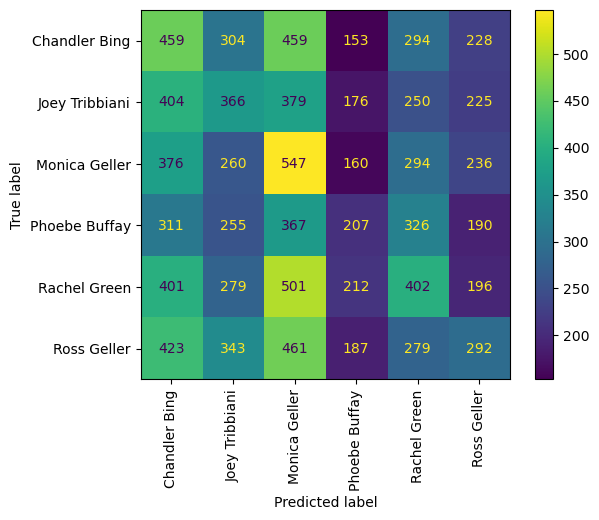

In [51]:
plot_confusion_matrix(estimator= gs_1, X= X_test, y_true= y_test)
plt.xticks(rotation = 90)
plt.show()

In [30]:
print(classification_report(y_true=y_test, y_pred=preds_1))

                precision    recall  f1-score   support

 Chandler Bing       0.19      0.24      0.21      1897
Joey Tribbiani       0.20      0.20      0.20      1800
 Monica Geller       0.20      0.29      0.24      1873
 Phoebe Buffay       0.19      0.12      0.15      1656
  Rachel Green       0.22      0.20      0.21      1991
   Ross Geller       0.21      0.15      0.17      1985

      accuracy                           0.20     11202
     macro avg       0.20      0.20      0.20     11202
  weighted avg       0.20      0.20      0.20     11202



---
**Making a dataframe with actual, predictions, and dialogue**

In [31]:
knn_1 = pd.DataFrame(y_test)

knn_1['predictions'] = preds_1

knn_1['dialogue'] = X_test

knn_1.rename(columns={'character': 'actual'}, inplace=True)
knn_1.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Ross Geller,Then what's the problem?
12970,Phoebe Buffay,Rachel Green,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Chandler Bing,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Chandler Bing,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Ross Geller,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Monica Geller,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Monica Geller,How are you?


In [32]:
knn_1['predictions'].value_counts()

Monica Geller     2714
Chandler Bing     2374
Rachel Green      1845
Joey Tribbiani    1807
Ross Geller       1367
Phoebe Buffay     1095
Name: predictions, dtype: int64

In [33]:
knn_1['actual'].value_counts()

Rachel Green      1991
Ross Geller       1985
Chandler Bing     1897
Monica Geller     1873
Joey Tribbiani    1800
Phoebe Buffay     1656
Name: actual, dtype: int64

In [34]:
knn_1[knn_1['actual'] != knn_1['predictions']].count()

actual         8929
predictions    8929
dialogue       8929
dtype: int64

In [35]:
knn_1[knn_1['actual'] == knn_1['predictions']].count()

actual         2273
predictions    2273
dialogue       2273
dtype: int64

---
**Predicting Some Phrases**

In [36]:
gs_1.predict(["How you doin'?"])[0]

'Rachel Green'

In [37]:
gs_1.predict(['Smelly cat, smelly cat, what are they feeding you'])[0]

'Rachel Green'

In [38]:
gs_1.predict(['We were on a break!'])[0]

'Rachel Green'

---
#### Another try!

In [39]:
grid_2 = {'cv__stop_words':[None, 'english'],
        'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
        'knn__n_neighbors': [13, 15, 17, 19, 21, 23, 25]
       }

In [40]:
gs_2 = GridSearchCV(estimator=pipe, param_grid= grid_2)
gs_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'cv__min_df': [0, 1, 2, 3, 4, 5, 6],
                         'cv__stop_words': [None, 'english'],
                         'knn__n_neighbors': [13, 15, 17, 19, 21, 23, 25]})

In [41]:
gs_2.best_params_

{'cv__min_df': 3, 'cv__stop_words': 'english', 'knn__n_neighbors': 21}

In [42]:
print(f'Train score: {gs_2.score(X_train, y_train)}\nTest score: {gs_2.score(X_test, y_test)}')

Train score: 0.31064754195929056
Test score: 0.2054990180324942


---
**Making Predictions**

In [43]:
preds_2 = gs_2.predict(X_test)

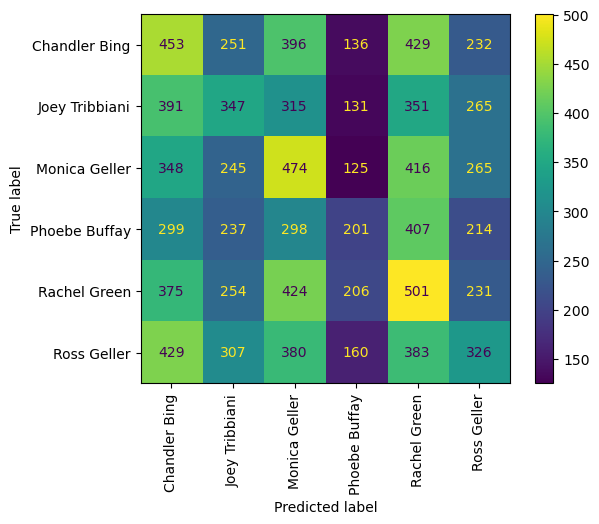

In [50]:
plot_confusion_matrix(estimator= gs_2, X= X_test, y_true= y_test)
plt.xticks(rotation = 90)
plt.show()

In [45]:
print(classification_report(y_true=y_test, y_pred=preds_2))

                precision    recall  f1-score   support

 Chandler Bing       0.20      0.24      0.22      1897
Joey Tribbiani       0.21      0.19      0.20      1800
 Monica Geller       0.21      0.25      0.23      1873
 Phoebe Buffay       0.21      0.12      0.15      1656
  Rachel Green       0.20      0.25      0.22      1991
   Ross Geller       0.21      0.16      0.19      1985

      accuracy                           0.21     11202
     macro avg       0.21      0.20      0.20     11202
  weighted avg       0.21      0.21      0.20     11202



---
**Making a dataframe with actual, predictions, and dialogue

In [46]:
knn_2 = pd.DataFrame(y_test)

knn_2['predictions'] = preds_2

knn_2['dialogue'] = X_test

knn_2.rename(columns={'character': 'actual'}, inplace=True)
knn_2.head(10)

,actual,predictions,dialogue
8260,Monica Geller,Chandler Bing,Then what's the problem?
12970,Phoebe Buffay,Joey Tribbiani,"Yeah, well, everybody does! I'm a really cool ..."
9682,Rachel Green,Monica Geller,What? What? He's interested in you. He-he like...
22017,Monica Geller,Monica Geller,I've never loved anybody as much as I love you.
5611,Rachel Green,Monica Geller,And I'm in it? Then let me read it.
22331,Joey Tribbiani,Joey Tribbiani,"Yeah, I gotta go! I got an acting job. Like yo..."
18609,Monica Geller,Chandler Bing,Great. So the ball is in his court?
23737,Monica Geller,Chandler Bing,"Dad, please don't pick your teeth out here! Al..."
35446,Ross Geller,Ross Geller,"Excellent! Excellent, now-now do you want anot..."
3756,Monica Geller,Rachel Green,How are you?


In [47]:
#Checking which character was predicted the most by this model 
knn_2['predictions'].value_counts()

Rachel Green      2487
Chandler Bing     2295
Monica Geller     2287
Joey Tribbiani    1641
Ross Geller       1533
Phoebe Buffay      959
Name: predictions, dtype: int64

In [48]:
#How many times the character actually appears 
knn_2['actual'].value_counts()

Rachel Green      1991
Ross Geller       1985
Chandler Bing     1897
Monica Geller     1873
Joey Tribbiani    1800
Phoebe Buffay     1656
Name: actual, dtype: int64

In [52]:
#How many predictions were wrong?
knn_2.loc[knn_2['actual']!= knn_2['predictions']].count()

actual         8900
predictions    8900
dialogue       8900
dtype: int64

In [53]:
#How many were right?
knn_2.loc[knn_2['actual']== knn_2['predictions']].count()

actual         2302
predictions    2302
dialogue       2302
dtype: int64

---
**Predicting Some Phrases**

In [54]:
gs_2.predict(["How you doin'?"])[0]

'Chandler Bing'

In [55]:
gs_2.predict(['Smelly cat, smelly cat, what are they feeding you'])[0]

'Rachel Green'

In [56]:
gs_2.predict(['We were on a break!'])[0]

'Ross Geller'

<br>

---- 
### Exporting the Model Using Pickle

In [60]:
#Using the best model which was the 
with open('../knn.pkl', mode='wb') as pickle_out:
    pickle.dump(gs_d, pickle_out)